In [45]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.coordinates import SkyCoord
from astropy.visualization import AsinhStretch, ImageNormalize
from matplotlib import ticker
from eDisk_source_dict import source_dict
from analysis_utils import fetch_beam_info, plot_2D_map, get_radec_coord, jypb_to_K_RJ
import warnings
from astropy.utils.exceptions import AstropyWarning
import seaborn as sns
warnings.simplefilter('ignore', category=AstropyWarning)
%matplotlib widget
%load_ext autoreload
%autoreload 2

col = sns.diverging_palette(220, 20)

# matplotlib style
plt.rcParams.update({
    # "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Times"], 
    "xtick.top": True,
    "ytick.right": True})

# colormap setting
from matplotlib import colors
freeze = np.loadtxt('/home/yamato/Project/MAPS/script/MAPS_cmap.txt')
freeze /= 255.0
cpal = colors.ListedColormap(freeze, name='freeze')

# species to plot
molecular_species = ["12CO", "13CO", "C18O", "SO"]
moments = ["M0", "M1", "M8"]
cmap = {"M0": cpal, "M1": "RdBu_r", "M8": "inferno"}
# cmap = {"M0": cpal, "M1": sns.diverging_palette(220, 20), "M8": "inferno"}
source_info = source_dict["L1489IRS"]
center_coord = SkyCoord(source_info["radec"], frame="icrs")
scale = (50 / source_info["distance"], "50 au")
data_scale = {"M0": 1.0, "M1": 1e-3, "M8": 1.0}
cbar_label = {"M0": r"mJy beam$^{-1}$ km s$^{-1}$", "M1": r"km s$^{-1}$", "M8": r"K"}
velocity_extent = 5 # in km/s
norm_kwargs = {"M0": {"vmin": 0.0, "stretch": AsinhStretch(a=0.1)}, "M1": {"vmin": source_info["v_sys"] - velocity_extent, "vmax": source_info["v_sys"] + velocity_extent}, "M8": {"vmin": 0.0}}
rmax = 2 # in arcsec

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Processing 12CO M0...
Processing 12CO M1...
Processing 12CO M8...
Processing 13CO M0...
Processing 13CO M1...
Processing 13CO M8...
Processing C18O M0...
Processing C18O M1...
Processing C18O M8...
Processing SO M0...
Processing SO M1...
Processing SO M8...


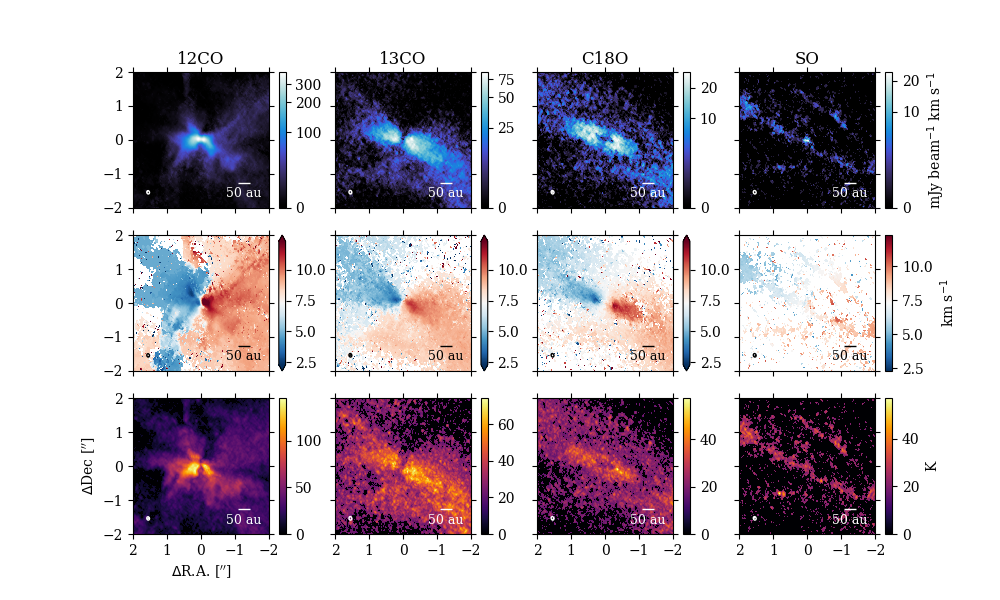

In [47]:
fig, axes = plt.subplots(3, len(molecular_species), figsize=(10, 6), sharex=True, sharey=True)

for i, ms in enumerate(molecular_species):
    for j, m in enumerate(moments):
        print("Processing {:s} {:s}...".format(ms, m))
        mappath = "/raid/work/yamato/eDisk_data/L1489IRS/ALMA_pipeline_reduced_data/try1_continuum_nterms1/L1489IRS_SBLB_{:s}_robust_0.5.image_{:s}.fits".format(ms, m)
        if ms == "12CO":
            mappath = mappath.replace(".image_{:s}.fits".format(m), ".image.sub_{:s}.fits".format(m))
        
        header = fits.getheader(mappath)
        data = fits.getdata(mappath).squeeze() * data_scale[m]

        x, y = get_radec_coord(header, center_coord=center_coord)
        beam = fetch_beam_info(header, pa_rotate=True)

        if m == "M8":
            nu = header["RESTFRQ"]
            data = jypb_to_K_RJ(data, nu, beam[:2])
        
        if m == "M1":
            beam_kw = sbar_kw =  {"color": "black"}
        else:
            beam_kw = sbar_kw = {}
        
        norm = ImageNormalize(data, **norm_kwargs[m])
        pcolorfast_kw = {'cmap': cmap[m], 'norm': norm}
        if i == 3:
            cbar_kw = {"label": cbar_label[m]}
        else:
            cbar_kw = {}
        plot_2D_map(data=data, X=x, Y=y, ax=axes[j, i], beam=beam, scale=scale, pcolorfast_kw=pcolorfast_kw, contour=False, cbar_kw=cbar_kw, beam_kw=beam_kw, sbar_kw=sbar_kw)

# put the title etc.
for i, ms in enumerate(molecular_species):
    axes[0, i].set_title(ms)

axes[2, 0].set(xlabel=r"$\Delta$R.A. [$^{\prime\prime}$]", ylabel=r"$\Delta$Dec [$^{\prime\prime}$]")

# polish
for ax in axes.ravel():
    ax.set(xlim=(rmax, -rmax), ylim=(-rmax, rmax))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
        

plt.show()


In [44]:
fig.savefig("L1489IRS_moment_maps_gallery_zoom.png", dpi=800, bbox_inches="tight", pad_inches=0.01)

In [18]:
import seaborn as sns

snscols = sns.xkcd_palette(["windows blue", "amber", "faded green", "greyish", "dusty purple", "pale red"])

In [19]:
snscols

[(0.21568627450980393, 0.47058823529411764, 0.7490196078431373),
 (0.996078431372549, 0.7019607843137254, 0.03137254901960784),
 (0.4823529411764706, 0.6980392156862745, 0.4549019607843137),
 (0.6588235294117647, 0.6431372549019608, 0.5843137254901961),
 (0.5098039215686274, 0.37254901960784315, 0.5294117647058824),
 (0.8509803921568627, 0.32941176470588235, 0.30196078431372547)]

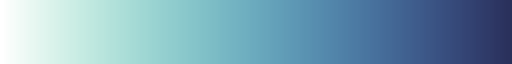

In [21]:
whblbk = sns.cubehelix_palette(light=1., dark=0.2, start=0.1, hue=1.0, rot=-0.3, as_cmap=True)
whblbk

In [33]:
col = sns.diverging_palette(220, 20, n=100)
col

[(0.24715576253545807, 0.49918708160096675, 0.5765599057376697),
 (0.25799248595720875, 0.5062116801243278, 0.5824385133952195),
 (0.2742475710898348, 0.5167485779093692, 0.5912564248815443),
 (0.28508429451158546, 0.5237731764327302, 0.5971350325390942),
 (0.3013393796442115, 0.5343100742177718, 0.6059529440254189),
 (0.3121761030659622, 0.5413346727411328, 0.6118315516829688),
 (0.32843118819858824, 0.5518715705261742, 0.6206494631692935),
 (0.34468627333121427, 0.5624084683112157, 0.6294673746556183),
 (0.355522996752965, 0.5694330668345767, 0.6353459823131682),
 (0.371778081885591, 0.5799699646196183, 0.6441638937994929),
 (0.3826148053073417, 0.5869945631429792, 0.6500425014570428),
 (0.39886989043996773, 0.5975314609280207, 0.6588604129433676),
 (0.41512497557259376, 0.6080683587130622, 0.6676783244296923),
 (0.4259616989943444, 0.6150929572364232, 0.6735569320872421),
 (0.44221678412697046, 0.6256298550214647, 0.6823748435735669),
 (0.45305350754872115, 0.6326544535448256, 0.6882534512311168),
 (0.4693085926813471, 0.6431913513298672, 0.6970713627174415),
 (0.4801453161030979, 0.6502159498532282, 0.7029499703749914),
 (0.49640040123572393, 0.6607528476382697, 0.7117678818613162),
 (0.5126554863683499, 0.6712897454233111, 0.720585793347641),
 (0.5234922097901006, 0.6783143439466721, 0.7264644010051908),
 (0.5397472949227267, 0.6888512417317136, 0.7352823124915155),
 (0.5505840183444775, 0.6958758402550747, 0.7411609201490654),
 (0.5668391034771034, 0.7064127380401162, 0.7499788316353903),
 (0.5830941886097294, 0.7169496358251576, 0.758796743121715),
 (0.5966295101492012, 0.7257235240198634, 0.7661392618658618),
 (0.6128845952818273, 0.7362604218049049, 0.7749571733521865),
 (0.6237213187035779, 0.7432850203282659, 0.7808357810097363),
 (0.639976403836204, 0.7538219181133073, 0.7896536924960611),
 (0.6508131272579546, 0.7608465166366684, 0.795532300153611),
 (0.6670682123905807, 0.7713834144217099, 0.8043502116399357),
 (0.6833232975232068, 0.7819203122067514, 0.8131681231262605),
 (0.6941600209449573, 0.7889449107301123, 0.8190467307838104),
 (0.7104151060775834, 0.7994818085151538, 0.8278646422701351),
 (0.7212518294993342, 0.8065064070385148, 0.833743249927685),
 (0.7375069146319602, 0.8170433048235562, 0.8425611614140097),
 (0.7537619997645862, 0.8275802026085979, 0.8513790729003345),
 (0.7645987231863368, 0.8346048011319588, 0.8572576805578844),
 (0.7808538083189629, 0.8451416989170003, 0.8660755920442091),
 (0.7916905317407137, 0.8521662974403612, 0.871954199701759),
 (0.8079456168733397, 0.8627031952254028, 0.8807721111880837),
 (0.8242007020059657, 0.8732400930104443, 0.8895900226744086),
 (0.8350374254277164, 0.8802646915338053, 0.8954686303319583),
 (0.8512925105603424, 0.8908015893188468, 0.9042865418182832),
 (0.8621292339820931, 0.8978261878422078, 0.910165149475833),
 (0.8783843191147193, 0.9083630856272492, 0.9189830609621578),
 (0.8892210425364698, 0.9153876841506102, 0.9248616686197076),
 (0.9054761276690958, 0.9259245819356517, 0.9336795801060325),
 (0.9217312128017218, 0.9364614797206933, 0.9424974915923572),
 (0.9325679362234727, 0.9434860782440543, 0.9483760992499071),
 (0.949351835543097, 0.9393784232070103, 0.9378998461147525),
 (0.9464130213022628, 0.9298204453158339, 0.9266426359336881),
 (0.9420047999410114, 0.9154834784790691, 0.9097568206620914),
 (0.9375965785797601, 0.9011465116423044, 0.8928710053904948),
 (0.9346577643389258, 0.891588533751128, 0.8816137952094303),
 (0.9302495429776745, 0.8772515669143632, 0.8647279799378337),
 (0.9273107287368402, 0.8676935890231868, 0.8534707697567692),
 (0.9229025073755889, 0.853356622186422, 0.8365849544851726),
 (0.9199636931347547, 0.8437986442952456, 0.825327744304108),
 (0.9155554717735033, 0.829461677458481, 0.8084419290325114),
 (0.9111472504122519, 0.8151247106217162, 0.7915561137609148),
 (0.9082084361714177, 0.8055667327305398, 0.7802989035798503),
 (0.9038002148101664, 0.7912297658937751, 0.7634130883082537),
 (0.9008614005693321, 0.7816717880

In [27]:
sns.set_palette(col, 16)